In [1]:
import numpy as np
import netCDF4 as nc
import sys,os

#import pandas as pd
from imogen import data_info
#import iris
#import iris.plot as iplt
#import iris.quickplot as qplt

from PlotTools import plot_tools as PTs

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,16)
%matplotlib inline


In [2]:
GtC_to_ppm=0.471
ppm_to_kgC = 1e12/GtC_to_ppm


Tile_names=data_info.TILE_short_names()
Tile_colours = data_info.TILE_colours()
nTiles=len(Tile_names)


In [3]:
CONFIG= 'PRE_INDUSTRIAL'  #'METHANE_FEEDBACK'  #  

DATA_DIR = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/'+CONFIG+'/'
PLOT_DIR = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/plots/Cveg_Bias/'

os.system('mkdir '+PLOT_DIR)


256

In [20]:
GCMs=data_info.GCMs()

GCMs=['CEN_CSIRO-QCCCE_MOD_CSIRO-Mk3-6-0','CEN_NOAA-GFDL_MOD_GFDL-ESM2G','CEN_MOHC_MOD_HadGEM2-ES']

nGCMs=len(GCMs)

In [21]:
ANCILS_DIR='/prj/CLIFFTOP/COMMON_DATA/ANCILS/'
GRID_file= ANCILS_DIR+'grid_info.nc'
grinf=nc.Dataset(GRID_file,'r')
lats_2d = grinf.variables['latitude'][:]
lons_2d = grinf.variables['longitude'][:]
Area_2d = grinf.variables['Area'][:]
land_index = grinf.variables['land_index'][:]
grinf.close()

AREA_file=ANCILS_DIR+'Area_in_iris_format.nc'
Ainf=nc.Dataset(AREA_file,'r')
AREA_1D = Ainf.variables['area'][:]
Ainf.close()

# soil layer thicknesses
#dz_soil= np.array([0.05,0.08408964,0.11397535,0.14142136,0.16718508,0.19168293,
#                   0.21517585,0.23784142,0.25980762,0.28117066,0.30200527,
#                   0.32237098,0.34231625,0.36188121])
#dweight_soil = dz_soil/np.sum(dz_soil)
#print(np.sum(dweight_soil))
#print(dweight_soil)

tiles= data_info.TILE_short_names


In [22]:

OBS_DIR  = '/prj/CLIFFTOP/PreIndustrialLandCover/'
OBS_list = ['hyde','hh','rf']
OBS_FILES = [ OBS_DIR+obs.upper()+'_AREAVEG/land-cover_'+obs+'_landcover_yr1850.nc' for obs in OBS_list ]
nOBS = len(OBS_list)

OBS_LCtypes = ['TrpEBF','TrpDBF','TmpEBF','TmpDBF',
               'SecTrpEBF','SecTrpDBF','SecTmpEBF','SecTmpDBF',
               'TmpENF','BorENF','BorDNF',
               'SecTmpENF','SecBorENF','SecBorDNF',
               'C3grass','C4grass',
               'Savanna',
               'C3crop','C4crop','C3past','C4past',
               'Denseshrub','Openshrub',
               'Tundra','Desert',
               'PdRI','Water','Urban',
              ]

OBS_LCgroups = ['BL-Tree','NL-Tree','Natural-Grasses','Agricultural-Grasses','Shrub','Soil','Savanna']
OBS_LCgroups_locs = [ range(0,8), range(8,14), range(14,16), range(17,21), range(21,23), [23,24], [16] ]
nGROUPS = len(OBS_LCgroups)
OBS_DICT = {}
for iobs in range(nOBS):
    OBS_DICT[OBS_list[iobs]]={}
    print(OBS_FILES[iobs])
    inf=nc.Dataset(OBS_FILES[iobs])
    if iobs==0:
        OBS_lat=inf.variables['latitude'][:]
        OBS_lon=inf.variables['longitude'][:]
        OBS_area=inf.variables['Grid_area'][:]
        
    nlats,nlons=len(inf.dimensions['latitude']),len(inf.dimensions['longitude'])
    for iGRP in range(nGROUPS):
        print(iGRP,OBS_LCgroups[iGRP])
        temp_data = np.zeros([nlats,nlons])
        for iLC in OBS_LCgroups_locs[iGRP]:
            indata = inf.variables[OBS_LCtypes[iLC]][:].squeeze()
            indata[indata<0.]=0.
            indata*=inf.variables[OBS_LCtypes[iLC]].scale_factor
            temp_data+=indata
            #print('     ',iLC, OBS_LCtypes[iLC])
            
        OBS_DICT[OBS_list[iobs]][OBS_LCgroups[iGRP]]=np.copy(temp_data)
        
    inf.close()

# Change OBS_LON to -180->180; don't need to rejig the data as this is just for indexing
OBS_lon[OBS_lon>180]-=360.
    

/prj/CLIFFTOP/PreIndustrialLandCover/HYDE_AREAVEG/land-cover_hyde_landcover_yr1850.nc
0 BL-Tree
1 NL-Tree
2 Natural-Grasses
3 Agricultural-Grasses
4 Shrub
5 Soil
6 Savanna
/prj/CLIFFTOP/PreIndustrialLandCover/HH_AREAVEG/land-cover_hh_landcover_yr1850.nc
0 BL-Tree
1 NL-Tree
2 Natural-Grasses
3 Agricultural-Grasses
4 Shrub
5 Soil
6 Savanna
/prj/CLIFFTOP/PreIndustrialLandCover/RF_AREAVEG/land-cover_rf_landcover_yr1850.nc
0 BL-Tree
1 NL-Tree
2 Natural-Grasses
3 Agricultural-Grasses
4 Shrub
5 Soil
6 Savanna


In [23]:
dumpfile = DATA_DIR+'EQUI_CEN_MOHC_MOD_HadGEM2-ES_0equi.dump.18500101.0.nc'
runfile  = DATA_DIR+'EQUI_CEN_MOHC_MOD_HadGEM2-ES_0equi.Annual_carbon.1850.nc'

PD_dir  = '/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/' 
                #'CEN_MOHC_MOD_HadGEM2-ES/EQUI_CEN_MOHC_MOD_HadGEM2-ES_presentday.Annual_carbon.2015.nc'

#dinf=nc.Dataset(dumpfile,'r')
#PI_frac = dinf.variables['frac'][:]
#PI_lat  = dinf.variables['latitude'][:]
#PI_lon  = dinf.variables['longitude'][:]
#PI_cvtot= dinf.variables['cv'][:]
#dinf.close()

rinf = nc.Dataset(runfile,'r')
PI_lat  = rinf.variables['latitude'][:].squeeze()
PI_lon  = rinf.variables['longitude'][:].squeeze()
PI_cv   = rinf.variables['c_veg'][:].squeeze()
PI_cvtot= rinf.variables['cv'][:].squeeze()
PI_frac = rinf.variables['frac'][:].squeeze()
rinf.close()


PD_cv=np.zeros_like(PI_cv)
PD_frac=np.zeros_like(PI_frac)
PD_cvtot=np.zeros_like(PI_cvtot)
for gcm in GCMs:
    PD_runfile=PD_dir+gcm+'/EQUI_'+gcm+'_presentday.Annual_carbon.2015.nc'
    print(PD_runfile)
    PDrinf = nc.Dataset(PD_runfile)
    PD_cv   += (1./nGCMs)*PDrinf.variables['c_veg'][:].squeeze()
    PD_cvtot+= (1./nGCMs)*PDrinf.variables['cv'][:].squeeze()
    PD_frac += (1./nGCMs)*PDrinf.variables['frac'][:].squeeze()
    PDrinf.close()

nJpts  = PI_frac.shape[1]
nTiles = PI_frac.shape[0]
nPFTs = PI_cv.shape[0]



/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/CEN_CSIRO-QCCCE_MOD_CSIRO-Mk3-6-0/EQUI_CEN_CSIRO-QCCCE_MOD_CSIRO-Mk3-6-0_presentday.Annual_carbon.2015.nc
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/CEN_NOAA-GFDL_MOD_GFDL-ESM2G/EQUI_CEN_NOAA-GFDL_MOD_GFDL-ESM2G_presentday.Annual_carbon.2015.nc
/prj/CLIFFTOP/ECP_output/EQUILIBRIUM_OUTPUT/BASELINE_CONFIG/CEN_MOHC_MOD_HadGEM2-ES/EQUI_CEN_MOHC_MOD_HadGEM2-ES_presentday.Annual_carbon.2015.nc


In [24]:
PD_cvtot_noLULUC = np.sum(PD_cv * PI_frac[:13,:],axis=0)

PI_cvtot_calc    = np.sum(PI_cv * PI_frac[:13,:],axis=0)


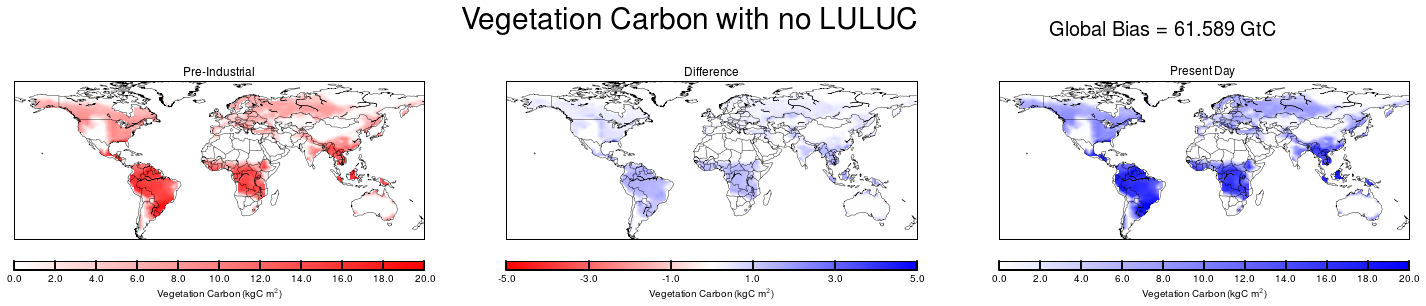

In [25]:
# plot CV, and CV differences:
DATA_RANGE=[0,20]
DIFF_RANGE=[-5,5]
nticks=11
nticksdiff=6
pad=0.05;
fraction=0.05

fig,axes = plt.subplots(ncols=3,nrows=1,figsize=(25,5))

# Plot JULES data in left axis
ax=axes[0]
plot_data=np.ma.masked_array(PI_cvtot_calc[land_index],mask=land_index.mask)   
IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                   DATA_RANGE=DATA_RANGE,
                   COLOURS=['white','red'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticks,
                   CBAR_LABEL='Vegetation Carbon (kgC m$^2$)',
                   RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                   PLOT_TITLE='Pre-Industrial',AXIS=ax,
                   FONTSIZES=[10,8,10,12]                )
# Plot OBS data in right axis
ax=axes[2]
plot_data=np.ma.masked_array(PD_cvtot_noLULUC[land_index],mask=land_index.mask)
# Plot Preindustrial
IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                   DATA_RANGE=DATA_RANGE,
                   COLOURS=['white','blue'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticks,
                   CBAR_LABEL='Vegetation Carbon (kgC m$^2$)',
                   RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                   PLOT_TITLE='Present Day',AXIS=ax,
                   FONTSIZES=[10,8,10,12]
                  )

# Plot OBS data in right axis
ax=axes[1]
DIFF_data=PD_cvtot_noLULUC-PI_cvtot_calc
plot_data=np.ma.masked_array(DIFF_data[land_index],mask=land_index.mask)
# Plot Preindustrial
IMAGE=PTs.plot_map(plot_data,lons_2d,lats_2d,
                   DATA_RANGE=DIFF_RANGE,
                   COLOURS=['red','white','blue'],INTERPOLATE_COLOURS=True,NLEVELS=250,NTICKS=nticksdiff,
                   CBAR_LABEL='Vegetation Carbon (kgC m$^2$)',
                   RESOLUTION='c', MAP_TYPE='Contour',SET_OVER='r',
                   PLOT_TITLE='Difference',AXIS=ax,
                   FONTSIZES=[10,8,10,12]
                  )

fig.suptitle('Vegetation Carbon with no LULUC',fontsize=30)
fig.text(0.7,0.9,'Global Bias = %8.3f'%(np.sum(DIFF_data*AREA_1D)*1e-12)+' GtC',fontsize=20)
#fig.text(0.7,0.9,'Global Bias = '+str(np.sum(DIFF_data*AREA_1D))+' kgC',fontsize=20)
fig.savefig(PLOT_DIR+'CVTotal_noLULUC.png')
fig.savefig(PLOT_DIR+'CVTotal_noLULUC.eps')



